Survival Analysis merupakan salah satu metode statistika untuk melakukan analisis lama waktu yang diperlukan hingga terjadinya suatu kejadian. Survival Analysis sering disebut juga sebagai time-to-event analysis. Melalui metode survival analysis ini, kita dapat melakukan perencanaan dengan baik atau mengambil langkah antisipasi terhadap suatu kejadian yang tidak diinginkan. Survival analysis pertama kali dikembangkan di bidang kedokteran untuk melihat pengaruh suatu treatment medis terhadap kesintasan pasien hingga meninggal dunia. Selain penerapan di bidang kedokteran, metode ini dapat diaplikasikan pada beberapa bidang atau industri berikut:

1. 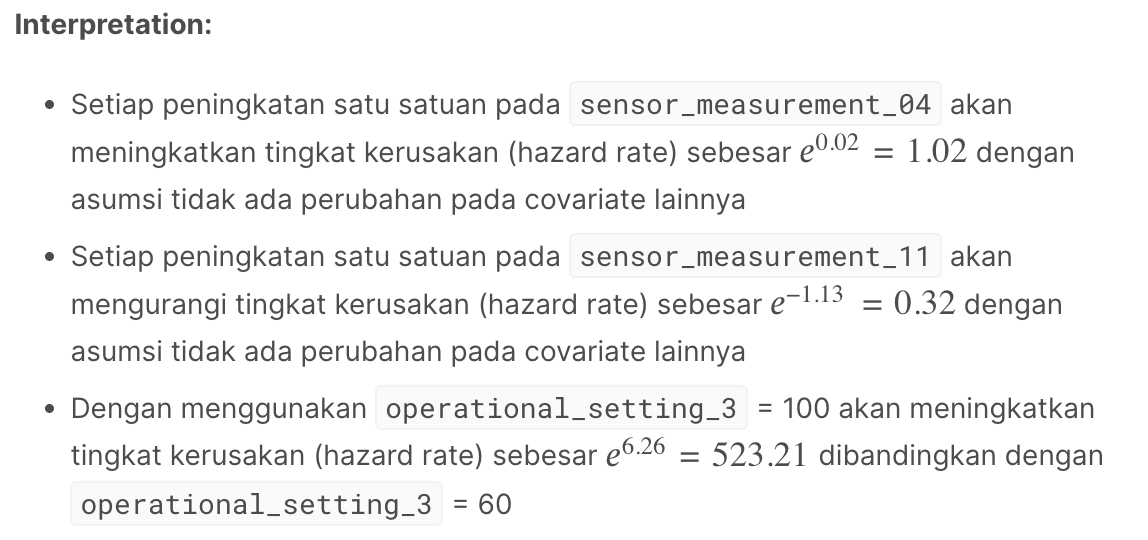Manufacturing : Memprediksi durasi mesin tetap berjalan hingga rusak
2. Marketing : Memprediksi durasi berlangganan seorang konsumen hingga berhenti berlangganan

Prompt: Beri kode untuk connect gcolab dengan gdrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Prompt: Beri kode untuk membaca dataset daru google drive menjadi dataframe

In [2]:
import pandas as pd

# Ganti 'path_to_your_file.csv' dengan jalur lengkap file di Google Drive
df = pd.read_csv('/content/drive/MyDrive/Dataset/survival_engine.csv')
df

,machine,cycle,operational_machine_01,operational_machine_02,operational_machine_03,operational_machine_04,operational_machine_05,operational_machine_06,operational_machine_07,operational_machine_08,...,operational_machine_15,operational_machine_16,operational_machine_17,operational_machine_18,operational_machine_19,operational_machine_20,operational_machine_21,operational_machine_22,operational_machine_23,operational_machine_24
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


Prompt: Berikan contoh kode Python untuk menampilkan informasi ringkasan tentang DataFrame df, termasuk jumlah baris, kolom, tipe data kolom, jumlah nilai non-null, dan penggunaan memori.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   machine                 53759 non-null  int64  
 1   cycle                   53759 non-null  int64  
 2   operational_machine_01  53759 non-null  float64
 3   operational_machine_02  53759 non-null  float64
 4   operational_machine_03  53759 non-null  float64
 5   operational_machine_04  53759 non-null  float64
 6   operational_machine_05  53759 non-null  float64
 7   operational_machine_06  53759 non-null  float64
 8   operational_machine_07  53759 non-null  float64
 9   operational_machine_08  53759 non-null  float64
 10  operational_machine_09  53759 non-null  float64
 11  operational_machine_10  53759 non-null  float64
 12  operational_machine_11  53759 non-null  float64
 13  operational_machine_12  53759 non-null  float64
 14  operational_machine_13  53759 non-null

#Apa Itu Censored Data?

Dalam analisis survival, "censored data" adalah data di mana kita tahu waktu awal pengamatan tetapi tidak tahu waktu tepat terjadinya suatu peristiwa (seperti kegagalan mesin). Ada dua jenis umum censoring:

1. Right censored : Observasi yang hingga batas akhir pengamatan tidak mengalami kejadian. Contoh: Seorang dokter mengamati kejadian kematian pada pasiennya yang terkena penyakit diabetes selama 12 bulan sejak didiagnosis penyakit tersebut. Jika terdapat pasien yang tidak meninggal selama 12 bulan tersebut maka observasi tersebut disebut right censored
2. Left censored : Observasi yang sudah mengalami kejadian sebelum waktu pengamatan dimulai. Contoh: Seseorang sudah terkena penyakit diabetes sebelum dokter mengamati pasien tersebut lebih lanjut.
3. Interval censored : Observasi yang tidak diketahui secara pasti kapan mengalami kejadian. Contoh: Seorang teknisi mesin mengamati unit-unit mesin hingga mesin tersebut rusak selama 3 bulan sekali. Misalkan terdapat mesin yang mati saat diamati pada bulan ke-9. Kita tidak ketahui secara pasti kapan mesin tersebut rusak namun yang kita ketahui adalah mesin tersebut rusak diantara bulan ke-6 dan ke-9.

Jika kita lihat pada data di atas, data yang kita miliki bukanlah data yang memiliki observasi right censored. Untuk mendapatkan observasi tersebut, kita lakukan tahapan berikut:

1. Memilih siklus maksimum hingga mesin rusak pada setiap mesin
2. Mengasumsikan batas akhir waktu pengamatan

Prompt:

Saya sedang menganalisis dataset yang berisi informasi tentang berbagai mesin, termasuk nama mesin dan siklus operasionalnya. Nama dataframe-nya adalah df. df terdiri dari fitur-fitur berikut:

RangeIndex: 53759 entries, 0 to 53758
Data columns (total 26 columns):

 \#   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  

 0   machine                 53759 non-null  int64  

 1   cycle                   53759 non-null  int64  

 2   operational_machine_01  53759 non-null  float64

 3   operational_machine_02  53759 non-null  float64

 4   operational_machine_03  53759 non-null  float64

 5   operational_machine_04  53759 non-null  float64

 6   operational_machine_05  53759 non-null  float64

 7   operational_machine_06  53759 non-null  float64

 8   operational_machine_07  53759 non-null  float64

 9   operational_machine_08  53759 non-null  float64

 10  operational_machine_09  53759 non-null  float64

 11  operational_machine_10  53759 non-null  float64

 12  operational_machine_11  53759 non-null  float64

 13  operational_machine_12  53759 non-null  float64

 14  operational_machine_13  53759 non-null  float64

 15  operational_machine_14  53759 non-null  float64

 16  operational_machine_15  53759 non-null  float64

 17  operational_machine_16  53759 non-null  float64

 18  operational_machine_17  53759 non-null  float64

 19  operational_machine_18  53759 non-null  float64

 20  operational_machine_19  53759 non-null  float64

 21  operational_machine_20  53759 non-null  int64  

 22  operational_machine_21  53759 non-null  int64  

 23  operational_machine_22  53759 non-null  float64

 24  operational_machine_23  53759 non-null  float64

 25  operational_machine_24  53759 non-null  float64

Saya ingin mengidentifikasi siklus operasional maksimum untuk setiap mesin sebelum mengalami kegagalan.

Tolong berikan contoh kode Python menggunakan pandas untuk memilih siklus maksimum per mesin dari DataFrame df, dimana 'machine' adalah nama mesin dan 'cycle' adalah jumlah siklus operasional.

Setelah itu, ubah DataFrame agar hanya berisi data untuk siklus maksimum dan set indeksnya menjadi 'machine_name'. Tampilkan juga lima baris pertama dari DataFrame yang telah diubah dengan nama df_max_cycle.

In [4]:
# Menghitung siklus maksimum untuk setiap mesin
max_cycle = df.groupby('machine')['cycle'].transform(max)

# Memfilter DataFrame untuk hanya menyertakan siklus maksimum
df_max_cycle = df[df['cycle'] == max_cycle]

# Mengatur 'machine' sebagai indeks
df_max_cycle.set_index('machine', inplace=True)

# Menampilkan lima baris pertama dari DataFrame yang diubah
df_max_cycle.head()

,cycle,operational_machine_01,operational_machine_02,operational_machine_03,operational_machine_04,operational_machine_05,operational_machine_06,operational_machine_07,operational_machine_08,operational_machine_09,...,operational_machine_15,operational_machine_16,operational_machine_17,operational_machine_18,operational_machine_19,operational_machine_20,operational_machine_21,operational_machine_22,operational_machine_23,operational_machine_24
machine,,,,,,,,,,,,,,,,,,,,,
1,149,42.0017,0.8414,100.0,445.00,550.49,1366.01,1149.81,3.91,5.71,...,129.55,2387.40,8066.19,9.4765,0.02,332,2212,100.0,10.45,6.2285
2,269,42.0047,0.8411,100.0,445.00,550.11,1368.75,1146.65,3.91,5.72,...,129.76,2388.42,8110.26,9.4315,0.02,334,2212,100.0,10.56,6.2615
3,206,42.0073,0.8400,100.0,445.00,550.80,1356.97,1144.89,3.91,5.72,...,130.02,2387.87,8082.25,9.4962,0.02,333,2212,100.0,10.46,6.3349
4,235,0.0030,0.0007,100.0,518.67,643.68,1605.86,1428.21,14.62,21.61,...,520.25,2388.17,8215.14,8.5784,0.03,397,2388,100.0,38.47,22.9717
5,154,42.0049,0.8408,100.0,445.00,550.53,1364.82,1146.87,3.91,5.72,...,130.05,2389.19,8151.36,9.4339,0.02,333,2212,100.0,10.74,6.3906


In [5]:
df_max_cycle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 1 to 260
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle                   260 non-null    int64  
 1   operational_machine_01  260 non-null    float64
 2   operational_machine_02  260 non-null    float64
 3   operational_machine_03  260 non-null    float64
 4   operational_machine_04  260 non-null    float64
 5   operational_machine_05  260 non-null    float64
 6   operational_machine_06  260 non-null    float64
 7   operational_machine_07  260 non-null    float64
 8   operational_machine_08  260 non-null    float64
 9   operational_machine_09  260 non-null    float64
 10  operational_machine_10  260 non-null    float64
 11  operational_machine_11  260 non-null    float64
 12  operational_machine_12  260 non-null    float64
 13  operational_machine_13  260 non-null    float64
 14  operational_machine_14  260 non-null    fl

Lollipop plot, merupakan jenis visualisasi data. Lollipop plot mirip dengan diagram batang, tetapi menggunakan lingkaran di ujung garis vertikal atau horizontal untuk menyoroti data poin. Kode tersebut digunakan untuk memvisualisasikan distribusi siklus maksimum untuk setiap mesin dalam dataset df (data turbo fan dari NASA jet).

Selanjutnya, kita buat lollipop plot untuk memperoleh distribusi siklus maksimum pada setiap mesin.

Prompt:

Saya sedang bekerja dengan dataset yang melacak siklus operasional mesin sebelum mengalami kegagalan. Saya ingin memvisualisasikan data ini dalam bentuk lollipop plot menggunakan Matplotlib di Python. Dataset saya disimpan dalam DataFrame df_max_cycle dengan kolom 'cycle' yang menunjukkan siklus maksimum untuk setiap mesin, dan indeks DataFrame mewakili ID mesin. Berikut informasi mengenai DataFrame df_max_cycle:

Int64Index: 260 entries, 1 to 260
Data columns (total 26 columns):

 \#   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  

 0   cycle                   260 non-null    int64  

 1   operational_machine_01  260 non-null    float64

 2   operational_machine_02  260 non-null    float64

 3   operational_machine_03  260 non-null    float64

 4   operational_machine_04  260 non-null    float64

 5   operational_machine_05  260 non-null    float64

 6   operational_machine_06  260 non-null    float64

 7   operational_machine_07  260 non-null    float64

 8   operational_machine_08  260 non-null    float64

 9   operational_machine_09  260 non-null    float64

 10  operational_machine_10  260 non-null    float64

 11  operational_machine_11  260 non-null    float64

 12  operational_machine_12  260 non-null    float64

 13  operational_machine_13  260 non-null    float64

 14  operational_machine_14  260 non-null    float64

 15  operational_machine_15  260 non-null    float64

 16  operational_machine_16  260 non-null    float64

 17  operational_machine_17  260 non-null    float64

 18  operational_machine_18  260 non-null    float64

 19  operational_machine_19  260 non-null    float64

 20  operational_machine_20  260 non-null    int64  

 21  operational_machine_21  260 non-null    int64  

 22  operational_machine_22  260 non-null    float64

 23  operational_machine_23  260 non-null    float64

 24  operational_machine_24  260 non-null    float64

 25  status                  260 non-null    bool  

Tolong berikan contoh kode untuk membuat lollipop plot dimana sumbu y menampilkan ID mesin, sumbu x menampilkan siklus, dan setiap poin pada plot diwakili dengan lingkaran di ujung garis horizontal. Tambahkan juga judul 'Max. Cycle' dan label sumbu yang sesuai.

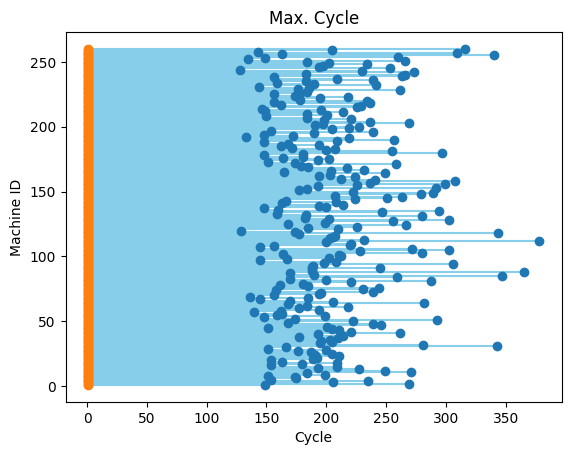

In [6]:
import matplotlib.pyplot as plt

# Membuat Lollipop Plot
plt.hlines(y=df_max_cycle.index, xmin=1, xmax=df_max_cycle['cycle'], color='skyblue')
plt.plot(df_max_cycle['cycle'], df_max_cycle.index, "o")
plt.plot([1 for i in range(len(df_max_cycle))], df_max_cycle.index, "o")

# Menambahkan judul dan label sumbu
plt.title("Max. Cycle")
plt.xlabel('Cycle')
plt.ylabel('Machine ID')

# Menampilkan plot
plt.show()

Kita asumsikan bahwa batas akhir waktu pengamatan adalah 220 siklus sehingga ketika mesin masih aktif setelah 220 siklus maka mesin tersebut akan dianggap right censored

Prompt:

Saya ingin menambahkan sebuah kolom baru ke DataFrame yang saya kerjakan, yang akan menandai status mesin berdasarkan jumlah siklus operasionalnya. Jika mesin memiliki lebih dari 200 siklus, maka statusnya harus False (berarti dianggap tidak aktif atau gagal), dan jika siklusnya 200 atau kurang, statusnya harus True (berarti aktif atau belum gagal).

Tolong berikan contoh kode Python menggunakan pandas yang menambahkan kolom 'status' ini ke DataFrame df_max_cycle dengan menggunakan fungsi .apply().

Berikut informasi mengenai DataFrame df_max_cycle:

Int64Index: 260 entries, 1 to 260
Data columns (total 26 columns):

 \#   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  

 0   cycle                   260 non-null    int64  

 1   operational_machine_01  260 non-null    float64

 2   operational_machine_02  260 non-null    float64

 3   operational_machine_03  260 non-null    float64

 4   operational_machine_04  260 non-null    float64

 5   operational_machine_05  260 non-null    float64

 6   operational_machine_06  260 non-null    float64

 7   operational_machine_07  260 non-null    float64

 8   operational_machine_08  260 non-null    float64

 9   operational_machine_09  260 non-null    float64

 10  operational_machine_10  260 non-null    float64

 11  operational_machine_11  260 non-null    float64

 12  operational_machine_12  260 non-null    float64

 13  operational_machine_13  260 non-null    float64

 14  operational_machine_14  260 non-null    float64

 15  operational_machine_15  260 non-null    float64

 16  operational_machine_16  260 non-null    float64

 17  operational_machine_17  260 non-null    float64

 18  operational_machine_18  260 non-null    float64

 19  operational_machine_19  260 non-null    float64

 20  operational_machine_20  260 non-null    int64  

 21  operational_machine_21  260 non-null    int64  

 22  operational_machine_22  260 non-null    float64

 23  operational_machine_23  260 non-null    float64

 24  operational_machine_24  260 non-null    float64

 25  status                  260 non-null    bool

In [7]:
# Fungsi untuk menentukan status berdasarkan siklus operasional
def determine_status(cycle):
    return cycle <= 200

# Menerapkan fungsi tersebut ke kolom 'cycle' untuk membuat kolom 'status' baru
df_max_cycle['status'] = df_max_cycle['cycle'].apply(determine_status)

# Menampilkan beberapa baris pertama untuk memverifikasi kolom 'status' baru
df_max_cycle.head()

<ipython-input-7-b3daa0b77a52>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max_cycle['status'] = df_max_cycle['cycle'].apply(determine_status)


,cycle,operational_machine_01,operational_machine_02,operational_machine_03,operational_machine_04,operational_machine_05,operational_machine_06,operational_machine_07,operational_machine_08,operational_machine_09,...,operational_machine_16,operational_machine_17,operational_machine_18,operational_machine_19,operational_machine_20,operational_machine_21,operational_machine_22,operational_machine_23,operational_machine_24,status
machine,,,,,,,,,,,,,,,,,,,,,
1,149,42.0017,0.8414,100.0,445.00,550.49,1366.01,1149.81,3.91,5.71,...,2387.40,8066.19,9.4765,0.02,332,2212,100.0,10.45,6.2285,True
2,269,42.0047,0.8411,100.0,445.00,550.11,1368.75,1146.65,3.91,5.72,...,2388.42,8110.26,9.4315,0.02,334,2212,100.0,10.56,6.2615,False
3,206,42.0073,0.8400,100.0,445.00,550.80,1356.97,1144.89,3.91,5.72,...,2387.87,8082.25,9.4962,0.02,333,2212,100.0,10.46,6.3349,False
4,235,0.0030,0.0007,100.0,518.67,643.68,1605.86,1428.21,14.62,21.61,...,2388.17,8215.14,8.5784,0.03,397,2388,100.0,38.47,22.9717,False
5,154,42.0049,0.8408,100.0,445.00,550.53,1364.82,1146.87,3.91,5.72,...,2389.19,8151.36,9.4339,0.02,333,2212,100.0,10.74,6.3906,True


Status mesin True menunjukkan bahwa mesin tersebut rusak dalam rentang waktu pengamatan sedangkan False menunjukkan mesin belum mengalami kejadian kerusakan selama rentang waktu pengamatan.

Prompt:

Saya memiliki sebuah DataFrame yang bernama df_max_cycle dan di dalamnya ada kolom 'status' yang berisi nilai boolean. Saya ingin melihat berapa banyak mesin yang memiliki status aktif dan berapa banyak yang tidak aktif. Tolong berikan contoh kode Python menggunakan pandas untuk menghitung dan menampilkan jumlah nilai True dan False dalam kolom 'status' ini.

In [8]:
# Menghitung dan menampilkan jumlah nilai True dan False dalam kolom 'status'
status_distribution = df_max_cycle['status'].value_counts()
print(status_distribution)


True     136
False    124
Name: status, dtype: int64


# Exploratory Data Analysis

Langkah selanjutnya adalah melakukan feature selection yaitu pemilihan kolom/variabel yang dapat dimasukkan ke dalam model

##Check Uniqueness

Pertama kita akan memeriksa banyak nilai unik pada setiap kolom lalu kolom yang memiliki nilai unik yang sedikit akan diganti dengan tipe data kategori.

Kolom yang dapat diganti ke tipe kategori: operational_setting_3, sensor_measurement_16

Prompt:

Saya ingin melakukan analisis eksplorasi data pada DataFrame df_max_cycle untuk memahami keragaman data. Bisa berikan saya contoh kode Python yang menggunakan pandas untuk menghitung jumlah nilai unik di setiap kolom dari DataFrame tersebut?

In [9]:
# Menghitung jumlah nilai unik di setiap kolom
unique_values = df_max_cycle.nunique()

# Menampilkan jumlah nilai unik
print(unique_values)


cycle                     133
operational_machine_01    165
operational_machine_02     62
operational_machine_03      2
operational_machine_04      6
operational_machine_05    188
operational_machine_06    257
operational_machine_07    251
operational_machine_08      6
operational_machine_09      8
operational_machine_10    209
operational_machine_11    177
operational_machine_12    259
operational_machine_13      8
operational_machine_14    123
operational_machine_15    198
operational_machine_16    152
operational_machine_17    258
operational_machine_18    247
operational_machine_19      2
operational_machine_20     27
operational_machine_21      6
operational_machine_22      2
operational_machine_23    135
operational_machine_24    253
status                      2
dtype: int64


Dari keluaran tersebut, berikut beberapa features yang bisa kita tetapkan sebagai kolom kategorikal:

operational_machine_03 dengan 2 nilai unik
operational_machine_19 dengan 2 nilai unik

Prompt:

Saya sedang bekerja dengan DataFrame df_max_cycle yang berisi berbagai pengaturan operasional dan pengukuran sensor. Kolom, dengan nama 'operational_machine_03',  'operational_machine_19', seharusnya dikategorikan karena mereka berisi nilai yang diskrit.

Berikan saya kode Python menggunakan pandas untuk mengubah tipe data dari kedua kolom ini menjadi 'category' dan kemudian menampilkan informasi ringkasan dari DataFrame yang diupdate?

In [10]:
import pandas as pd

# Asumsikan df_max_cycle adalah DataFrame Anda
# df_max_cycle = pd.read_csv('path_to_your_file.csv')  # Misalnya, baca dari file CSV

# Daftar kolom yang akan diubah tipe datanya menjadi 'category'
category_columns = [
    'operational_machine_03',
    'operational_machine_19'
]

# Mengubah tipe data kolom tersebut menjadi 'category'
df_max_cycle[category_columns] = df_max_cycle[category_columns].astype('category')

# Menampilkan informasi ringkasan dari DataFrame yang diupdate
df_max_cycle.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 1 to 260
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   cycle                   260 non-null    int64   
 1   operational_machine_01  260 non-null    float64 
 2   operational_machine_02  260 non-null    float64 
 3   operational_machine_03  260 non-null    category
 4   operational_machine_04  260 non-null    float64 
 5   operational_machine_05  260 non-null    float64 
 6   operational_machine_06  260 non-null    float64 
 7   operational_machine_07  260 non-null    float64 
 8   operational_machine_08  260 non-null    float64 
 9   operational_machine_09  260 non-null    float64 
 10  operational_machine_10  260 non-null    float64 
 11  operational_machine_11  260 non-null    float64 
 12  operational_machine_12  260 non-null    float64 
 13  operational_machine_13  260 non-null    float64 
 14  operational_machine_14  26

<ipython-input-10-52213ad16a33>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max_cycle[category_columns] = df_max_cycle[category_columns].astype('category')


## Correlation Heatmap

Kita dapat memeriksa korelasi antar kolom calon prediktor untuk melihat apakah terdapat korelasi yang tinggi antar prediktor. Variabel yang memiliki korelasi yang tinggi dengan variabel lainnya perlu dipilih salah satu saja untuk menghindari terjadinya multikolinearitas.

Prompt:

Saya sedang menganalisis korelasi antar fitur dalam DataFrame df_max_cycle dan ingin memvisualisasikan kuadrat nilai korelasi ini dalam bentuk heatmap.

Bisa berikan saya contoh kode Python yang menggunakan Seaborn untuk membuat heatmap dari kuadrat nilai korelasi antar kolom di df_max_cycle. Saya juga ingin angka korelasi ditampilkan di dalam setiap kotak heatmap.

Gambar heatmap correlationnya besar dan menggunakan scroll bar ya supaya angkanya terlihat!

<ipython-input-11-5b58b2efa39a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_squared = df_max_cycle.corr()**2


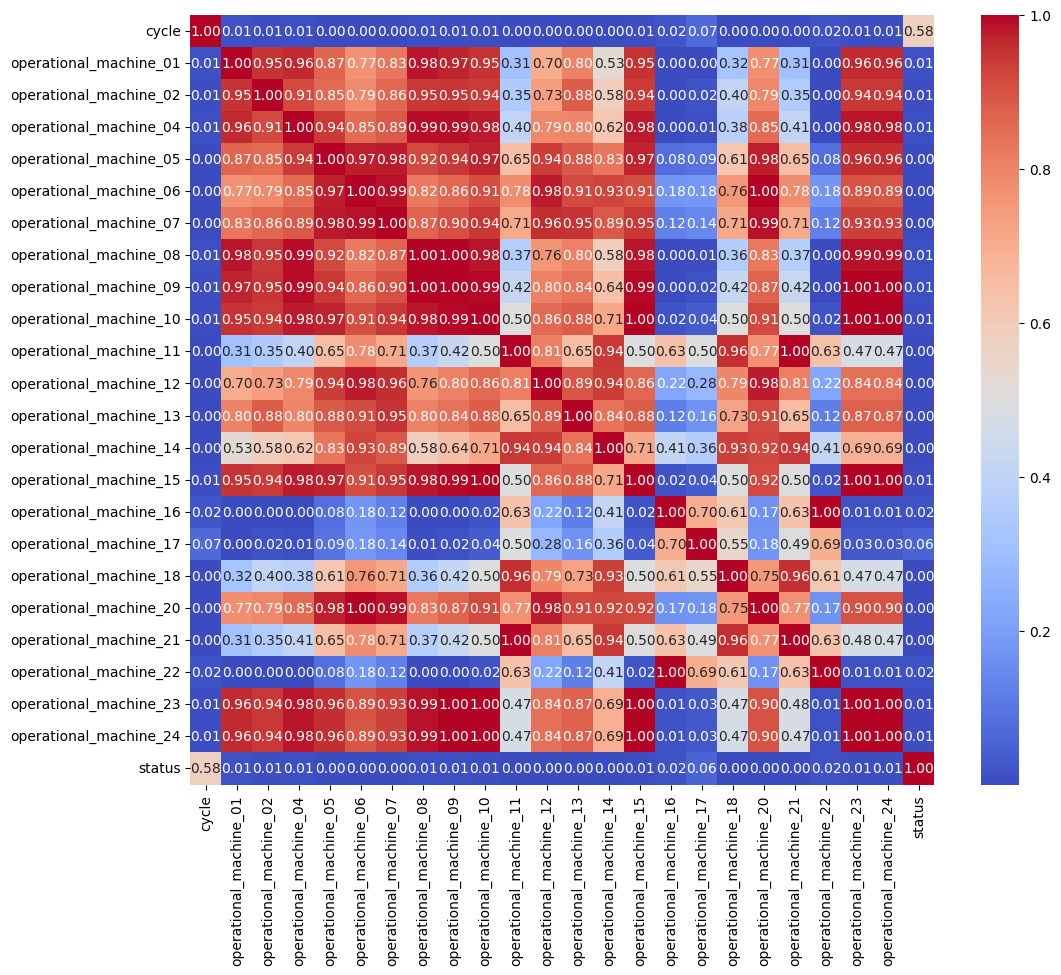

In [11]:
import seaborn as sns

# Menghitung kuadrat nilai korelasi
corr_matrix_squared = df_max_cycle.corr()**2

# Membuat gambar yang lebih besar untuk heatmap
plt.figure(figsize=(12, 10))  # Anda dapat menyesuaikan ukuran sesuai kebutuhan

# Membuat heatmap
sns.heatmap(corr_matrix_squared, annot=True, fmt='.2f', cmap='coolwarm')

# Menampilkan plot dengan scroll bar jika diperlukan
plt.show()

Pada plot di atas, korelasi antar variabel terlihat cukup tinggi. Pada kasus ini kita akan coba pilih terlebih dahulu kolom sensor_measurement_04,sensor_measurement_08, sensor_measurement_11, sensor_measurement_14

<ipython-input-22-9c71ea8363a9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaned_data.corr(), annot = True)


<Axes: >

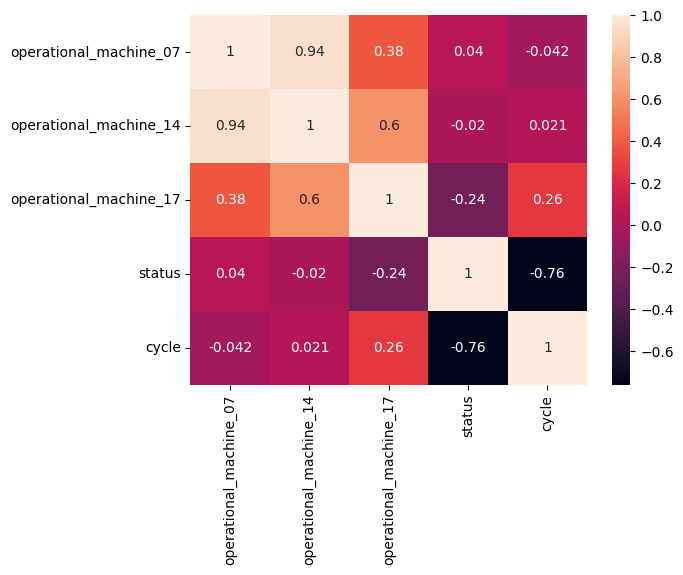

In [22]:
selected_columns = ['operational_machine_07','operational_machine_14','operational_machine_17']
cleaned_data = df_max_cycle.loc[:, selected_columns + category_columns + ['status', 'cycle']]
sns.heatmap(cleaned_data.corr(), annot = True)

## Data Preparation for Modeling
Langkah selanjutnya adalah menyiapkan data untuk melakukan pemodelan. Hal yang perlu diperhatikan adalah:

Untuk kolom dengan tipe kategori perlu dilakukan One Hot Encoding
Untuk data target, perlu dituliskan dalam bentuk array dengan setiap elemennya adalah sebuah tuple yang terdiri dari status mesin (True/False) dan waktu/siklusnya

Prompt:

Saya perlu menginstal pustaka scikit-survival untuk analisis survival di Python. Setelah instalasi, saya ingin menerapkan one hot encoding pada beberapa kolom kategorikal dalam DataFrame df_max_cycle. Kolom-kolom ini terdaftar dalam list category_columns. Tolong berikan contoh kode untuk menginstal scikit-survival, melakukan one hot encoding pada kolom-kolom tersebut menggunakan OneHotEncoder dari sksurv, dan menampilkan lima baris pertama dari DataFrame yang telah ditransformasi.

In [12]:
pip install scikit-survival

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 86.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [23]:
# One Hot Encoding for Categorical Variable
from sksurv.preprocessing import OneHotEncoder

data_x = OneHotEncoder().fit_transform(cleaned_data.iloc[:, :-2])
data_x.head()

,operational_machine_07,operational_machine_14,operational_machine_17,operational_machine_03=100.0,operational_machine_19=0.03
machine,,,,,
1,1149.81,42.77,8066.19,1.0,0.0
2,1146.65,42.64,8110.26,1.0,0.0
3,1144.89,42.85,8082.25,1.0,0.0
4,1428.21,48.25,8215.14,1.0,1.0
5,1146.87,42.67,8151.36,1.0,0.0


In [24]:
import numpy as np

# Preprocessing for target variable
data_y = list(df_max_cycle.loc[:, ["status", "cycle"]].itertuples(index = None, name = None))
data_y = np.array(data_y, dtype=[('status', bool), ('cycle', float)])
data_y[:5]

array([( True, 149.), (False, 269.), (False, 206.), (False, 235.),
       ( True, 154.)], dtype=[('status', '?'), ('cycle', '<f8')])

Kode Python di atas sedang melakukan pra-pemrosesan untuk variabel target yang akan digunakan dalam pemodelan atau analisis statistik. Kode tersebut melakukan langkah-langkah berikut:

1. Impor pustaka `numpy` dengan alias `np`.

2. Membuat daftar tuple (`data_y`) dari dua kolom 'status' dan 'cycle' yang dipilih dari DataFrame `df_max_cycle`. Ini dilakukan dengan menggunakan metode `.loc[]` untuk pemilihan kolom, diikuti dengan `.itertuples()` untuk iterasi melalui baris DataFrame dan mengonversinya menjadi tuple tanpa indeks atau nama.

3. Konversi daftar tuple tersebut ke dalam array NumPy dengan tipe data tertentu, di mana 'status' diatur sebagai tipe boolean (`bool`) dan 'cycle' sebagai tipe float.

4. Menampilkan lima elemen pertama dari array `data_y` yang baru dibuat.

Outputnya adalah array NumPy yang menunjukkan lima pasang nilai, dengan status mesin (`True` atau `False`) dan nilai siklus yang berkaitan (sebagai float), yang mungkin menunjukkan waktu hingga event (seperti kegagalan) atau durasi siklus operasional mesin.

Ini adalah langkah umum dalam persiapan data untuk analisis survival atau pemodelan risiko, di mana 'status' bisa menunjukkan apakah suatu event (seperti kegagalan) terjadi, dan 'cycle' bisa menunjukkan waktu sampai kegagalan atau waktu pengamatan.

##Kaplan Meier Estimator

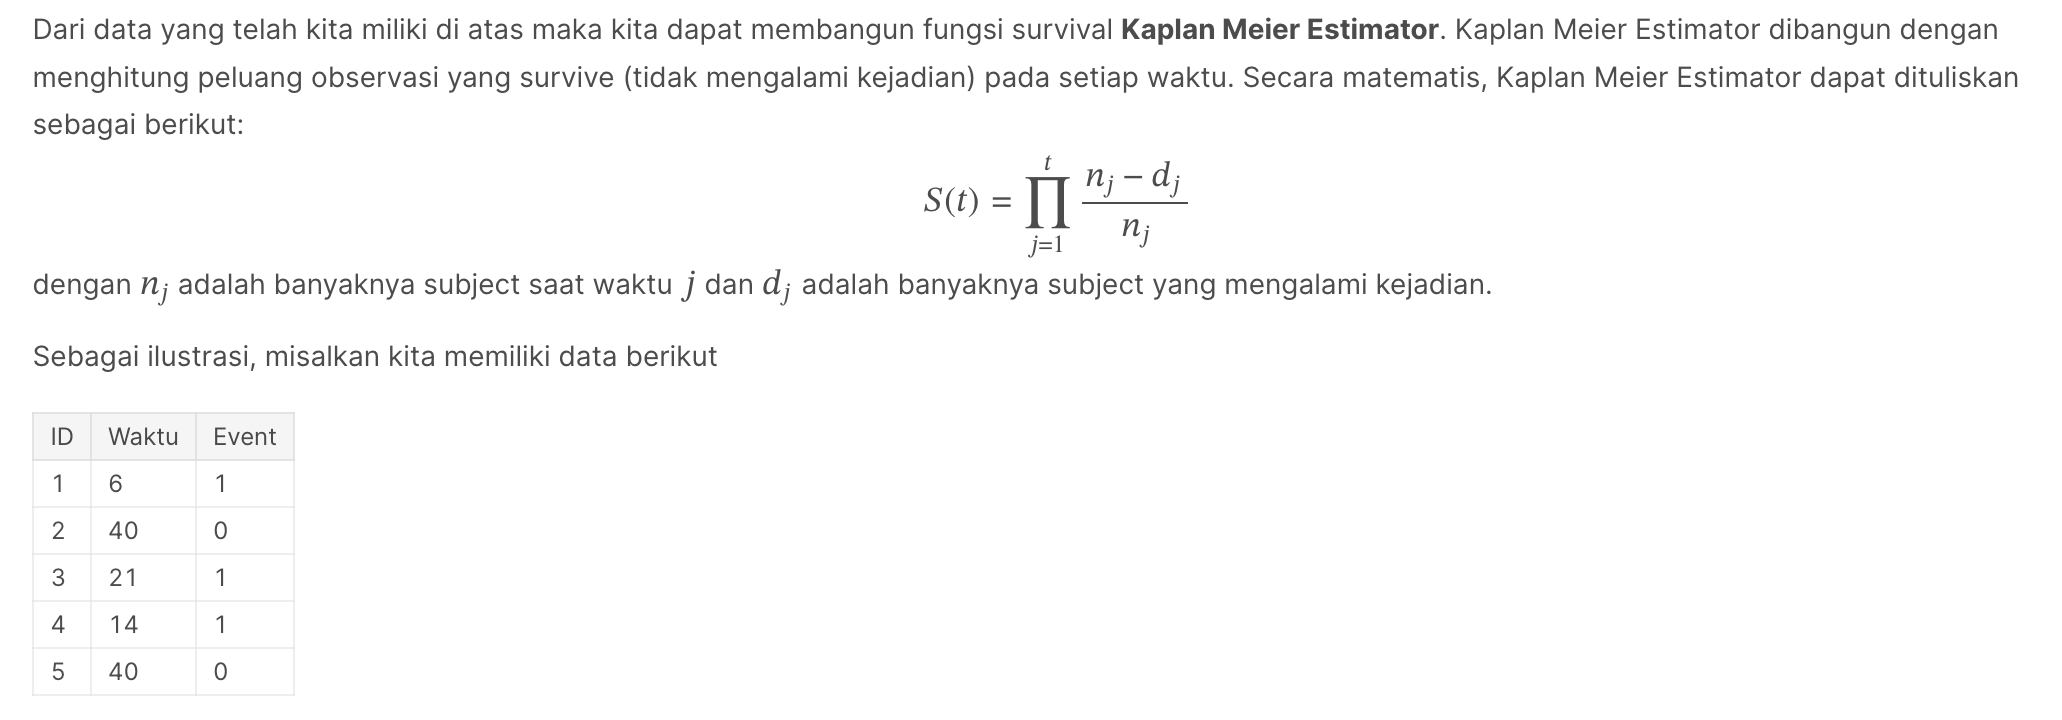

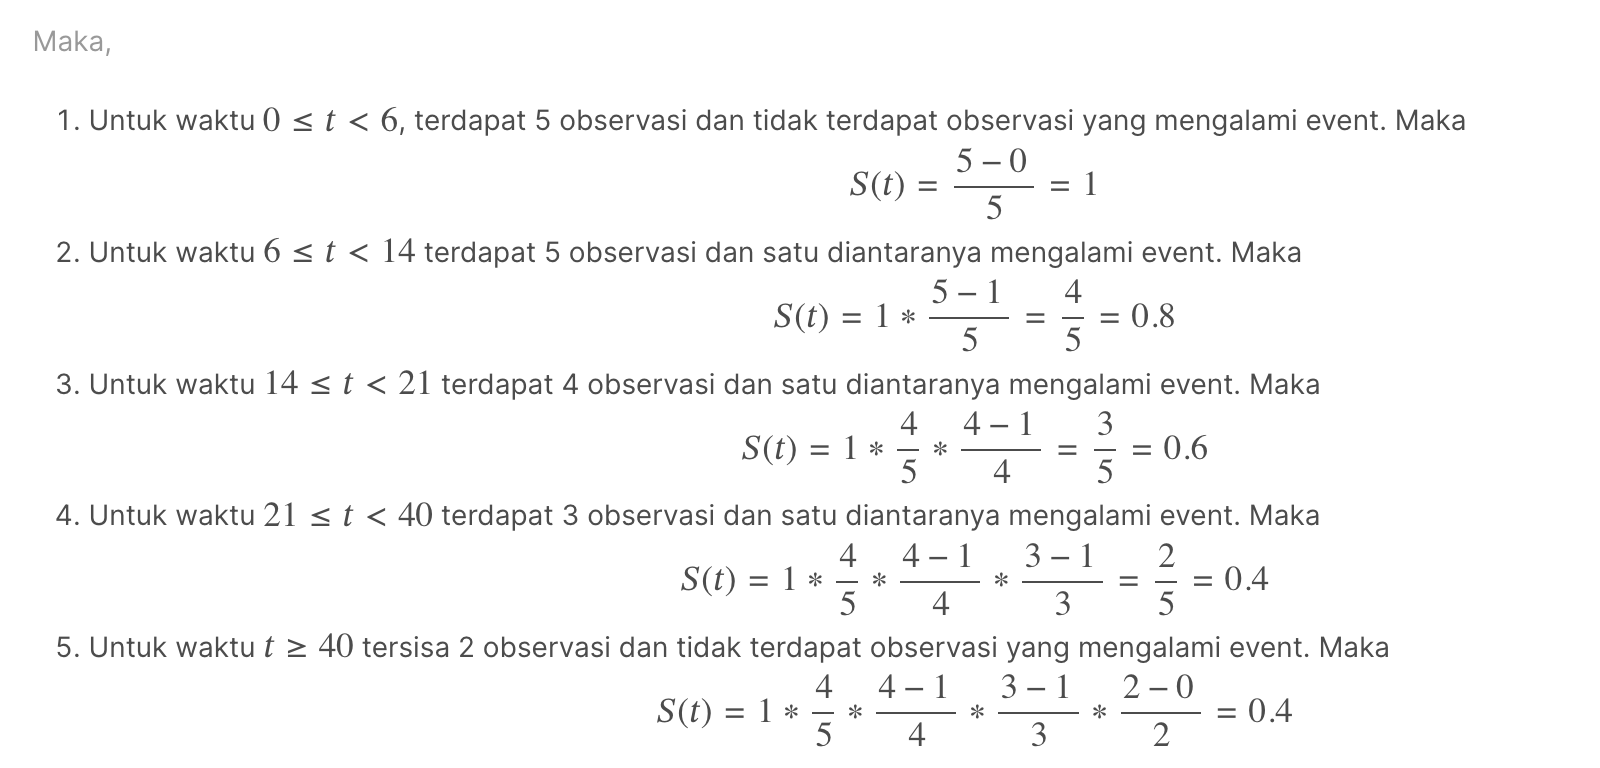

Berikut adalah cara untuk membangun fungsi survival menggunakan Kaplan Meier Estimator menggunakan package sksurv:

Text(0.5, 0, 'time $t$')

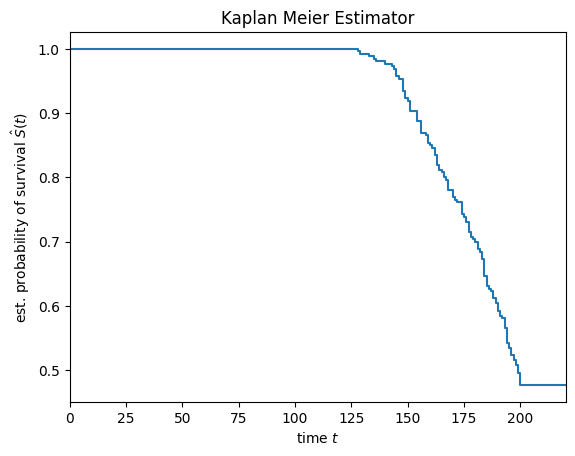

In [25]:
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(data_y["status"], data_y["cycle"])
time, survival_prob = np.append(0, time), np.append(1, survival_prob)

# Plotting
plt.step(time, survival_prob, where = "post")
plt.xlim(left = 0, right = 220)
plt.title("Kaplan Meier Estimator")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

Interpretasi:

1. Hingga saat  𝑡=125
  nilai  𝑆(𝑡)=1
  yang menunjukkan bahwa semua mesin tetap hidup hingga siklus ke-125
2. Saat  𝑡=175
  nilai  𝑆(𝑡)
  berada di sekitar 0.75 menunjukkan bahwa setelah terdapat sekitar 75% mesin tetap hidup hingga siklus ke 175
3. Peluang mesin tetap hidup menjadi 50% setelah siklus ke-190

## Compare Survival Time for Each Category in Every Categorical Columns

Kita telah mempelajari bagaimana membangun fungsi survival menggunakan Kaplan Meier Estimator. Terkadang kita ingin melakukan perbandingan apakah adanya perbedaan kategori/perlakuan akan memengaruhi kesintasan subjek yang kita amati.

Misalkan, pada data df_max_cycle kita memiliki kolom-kolom yang memiliki tipe kategori. Mari kita periksa nilai-nilai unik pada  kolom tersebut.

In this section, we will compare the distribution of survival time for each category in every categorical columns. From the distribution we hope that we can determined if there is a difference distribution for each category or not.

Prompt:

Saya memiliki DataFrame df_max_cycle yang berisi beberapa kolom kategorikal yang perlu saya eksplorasi. Kolom-kolom ini terdaftar dalam category_columns. Tolong berikan saya contoh kode Python yang akan mencetak nilai-nilai unik dari kolom-kolom ini ke layar.

In [26]:
for column in category_columns:
    unique_values = list(df_max_cycle[column].unique())
    print(f'Nilai unik {column}: {unique_values}')

Nilai unik operational_machine_03: [100.0, 60.0]
Nilai unik operational_machine_19: [0.02, 0.03]


In [17]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 12.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=9b9c35fb60a305dcbee79eb247d81e7e2be9362a555a25c4ec4604fc36e2ceb7
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


Prompt:

Buatan sebelumnya, saya berhasil membuat visualisasi kurva survival menggunakan Kaplan-Meier Estimator untuk masing-masing nilai unik dalam beberapa kolom kategorikal dalam DataFrame df_max_cycle. Berikan saya contoh kode Python untuk melakukan hal yang sama, tetapi kali ini saya ingin mengganti kolom-kolom yang digunakan dengan kolom-kolom berikut: category_columns = [
    'operational_machine_03',
    'operational_machine_19'
]. Kode tersebut harus menghasilkan subplot yang menunjukkan kurva survival untuk setiap nilai unik dalam kolom-kolom tersebut dan harus memiliki judul yang sesuai, label sumbu, dan legenda yang menunjukkan nilai-nilai kategori.

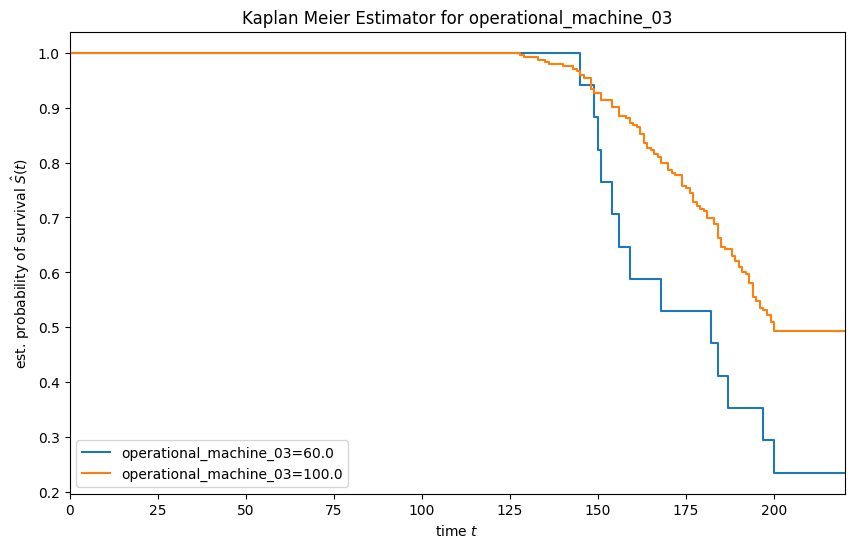

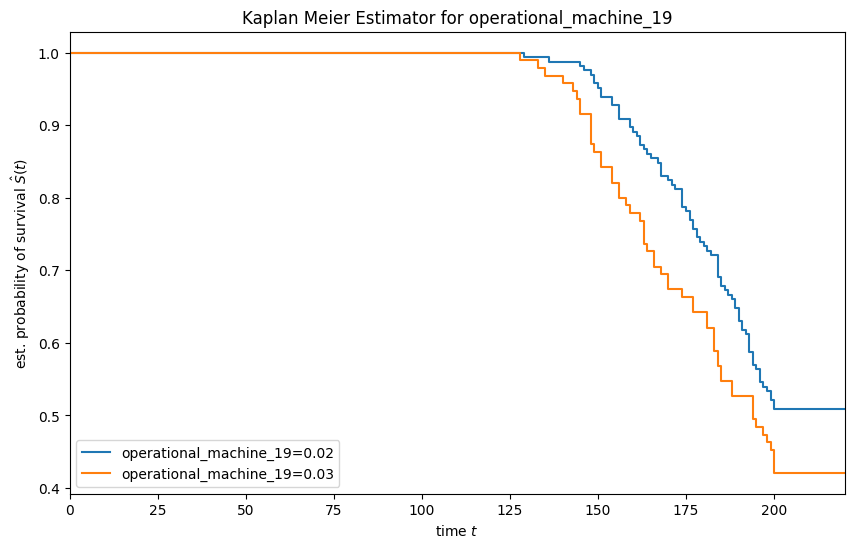

In [18]:
from sksurv.nonparametric import kaplan_meier_estimator

# Plotting survival curves for each unique value in categorical columns
for column in category_columns:
    unique_values = df_max_cycle[column].cat.categories
    plt.figure(figsize=(10, 6))

    for category in unique_values:
        category_df = df_max_cycle[df_max_cycle[column] == category]
        time, survival_prob = kaplan_meier_estimator(category_df['status'], category_df['cycle'])
        time, survival_prob = np.append(0, time), np.append(1, survival_prob)
        plt.step(time, survival_prob, where="post", label=f'{column}={category}')

    plt.xlim(left=0, right=220)
    plt.title(f"Kaplan Meier Estimator for {column}")
    plt.ylabel("est. probability of survival $\hat{S}(t)$")
    plt.xlabel("time $t$")
    plt.legend(loc="best")
    plt.show()


Interpretasi: Berdasarkan visualisasi di atas, dapat kita lihat bahwa nilai operational_machine_03 = 100 cenderung memiliki nilai fungsi survival yang lebih tinggi dibandingkan operational_machine_03 = 60 yang menunjukkan bahwa operational_machine_03 = 100 lebih tahan lama dibandingkan operational_machine_03 = 60

## Log-Rank Test

Pada bagian sebelumnya, kita telah melakukan perbandingan distribusi fungsi survival melalui visualisasi. Namun terkadang kita memerlukan uji statistik lebih lanjut untuk memastikan apakah kedua distribusi tersebut dapat dikatakan sama atau berbeda secara signifikan. Untuk melakukan pengujian tersebut, kita dapat menggunakan Log-Rank Test dengan hipotesis

𝐻0: Distribusi kedua fungsi survival sama

𝐻1: Distribusi kedua fungsi survival berbeda

In [19]:
from sksurv.compare import compare_survival

p_value_list = []

for column in category_columns:
    p_value = compare_survival(data_y, df_max_cycle[column])[1]
    p_value_list.append(p_value)

result = pd.DataFrame({'columns': category_columns, 'p-value': p_value_list}).set_index('columns')
result['conclusion'] = result['p-value'].apply(lambda x: "significant" if x < 0.05 else "not significant")
result

,p-value,conclusion
columns,,
operational_machine_03,0.009559,significant
operational_machine_19,0.078070,not significant


Dalam contoh kode yang diberikan:

- Kami memilih beberapa kolom fitur kategorikal (category_columns) untuk membandingkan distribusi fungsi survivalnya.
- Kami melakukan pengujian Log-Rank Test untuk setiap kolom fitur kategorikal tersebut terhadap variabel target data_y (status dan cycle).
- Hasil dari pengujian disimpan dalam bentuk p-value, yang merupakan nilai probabilitas bahwa distribusi fungsi survival berbeda secara signifikan.
- Jika p-value kurang dari 0.05 (tingkat signifikansi yang umum digunakan), maka kami menyimpulkan bahwa distribusi fungsi survival berbeda secara signifikan ("significant"). Jika p-value lebih besar dari 0.05, maka kami menyimpulkan bahwa distribusi fungsi survival tidak berbeda secara signifikan ("not significant").


Dalam hasil yang ditampilkan:
- Kolom "columns" berisi nama kolom fitur kategorikal yang diuji.
- Kolom "p-value" berisi nilai p-value dari hasil Log-Rank Test.
- Kolom "conclusion" berisi kesimpulan berdasarkan p-value, di mana "significant" berarti distribusi fungsi survival berbeda secara signifikan, dan "not significant" berarti distribusi fungsi survival tidak berbeda secara signifikan.

## Cox Propotional Hazard

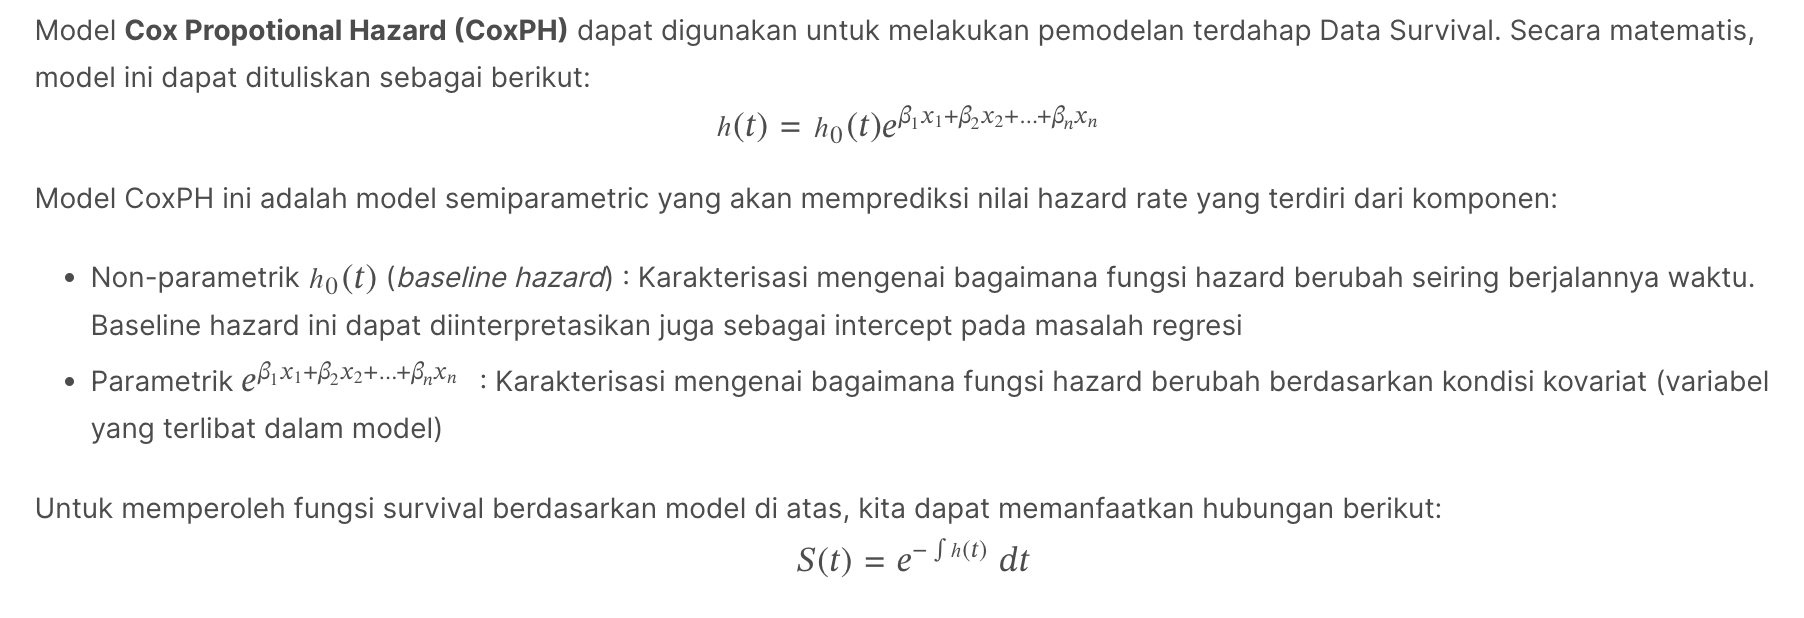

Kita dapat memanfaatkan fungsi CoxPHSurvivalAnalysis dari package sksurv untuk membangun model CoxPH. Pada kasus ini, kita gunakan parameter alpha = 1e-4 sebagai untuk regularisasi. Dokumentasi lebih lengkap untuk penggunaan fungsi ini dapat dilihat pada [dokumentasi berikut](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.linear_model.CoxPHSurvivalAnalysis.html)

In [27]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

# Define model
estimator = CoxPHSurvivalAnalysis(verbose = 10)

# Fitting model
estimator.fit(data_x, data_y)

iter      1: update = [-0.02241666  1.12069727  0.0102153  -5.6773435  -0.26861366]
iter      1: loss = 2.6738789421
iter      2: update = [-0.00145869  0.0076373   0.00177671 -0.52851688  0.23195836]
iter      2: loss = 2.6717255659
iter      3: update = [ 3.28696070e-05 -3.91939007e-04  1.59778420e-05 -1.75884013e-02
 -5.25130380e-03]
iter      3: loss = 2.6717210916
iter      4: update = [-7.37480066e-08  2.29465635e-06 -2.21974753e-08 -7.26060942e-05
  7.85420841e-06]
iter      4: loss = 2.6717210915
iter      4: optimization converged


CoxPHSurvivalAnalysis(verbose=10)

In [28]:
# Coef model
pd.Series(estimator.coef_, index = data_x.columns)

operational_machine_07          0.023843
operational_machine_14         -1.127945
operational_machine_17         -0.012008
operational_machine_03=100.0    6.223521
operational_machine_19=0.03     0.041899
dtype: float64

Setelah melakukan fitting model, mari kita lihat koefisien dari model dengan menggunakan attribute .coef_

In [29]:
# Coef model
pd.Series(estimator.coef_, index = data_x.columns)

operational_machine_07          0.023843
operational_machine_14         -1.127945
operational_machine_17         -0.012008
operational_machine_03=100.0    6.223521
operational_machine_19=0.03     0.041899
dtype: float64

# Model Evaluation

Salah satu metrics yang dapat digunakan untuk mengevaluasi model survival analysis adalah C-index. Pada masalah survival analysis, C-index merepresentasikan seberapa mampu model dapat membedakan risiko suatu observasi. Ketika nilai C-index menuju 1 maka model memiliki kemampuan untuk membedakan observasi yang memiliki risiko tinggi dan rendah sedangkan jika nilainya menuju 0.5 maka model tidak memiliki kemampuan untuk membedakan observasi yang berisiko tinggi atau rendah.

In [31]:
from sksurv.metrics import concordance_index_censored

# Cara 1
prediction = estimator.predict(data_x)
result = concordance_index_censored(df_max_cycle["status"], df_max_cycle["cycle"], prediction)
result[0]

0.663769123783032

In [32]:
# Cara 2
estimator.score(data_x, data_y)

0.663769123783032